# An Experimental Study on Breast Ultrasound Tumor Classification



In this Notebook we explore the CNN based classification of Breast US Tumor Images. The main idea is to study the efficiency of benign vs. malignant classification of the images with the help of pretrained Deep CNN models. Particularly for this notebook, the Ground Truth Tumor Masks are not going to be utilized for the purpose of classification.

For the purpose experimentation two publicly available datasets are utilized, 

*   BUSI dataset. (https://www.sciencedirect.com/science/article/pii/S2352340919312181)
*   UDIAT dataset. (https://ieeexplore.ieee.org/abstract/document/8003418)



The dataset images have been preprocessed and converted to 224x224 dimensionality and saved as .npy files. These files will be used directly in this Notebook.

In [1]:
# Connect to Google Drive to access dataset
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Check dataset filenames
import os
import cv2

bus_filenames = os.listdir('/content/gdrive/My Drive/BreastUSDatasetNPYs')
print(bus_filenames)

['busiTestImages.npy', 'busiTestLabels.npy', 'busiTestMasks.npy', 'busiTrainImages.npy', 'udTrainImages.npy', 'busiTrainMasks.npy', 'udTestLabels.npy', 'udTestMasks.npy', 'udTestImages.npy', 'busiTrainLabels.npy', 'udTrainLabels.npy', 'udTrainMasks.npy']


In [3]:
# Read the Numpy files containing the dataset.
import numpy as np

busiTrainImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTrainImages.npy')
busiTrainMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTrainMasks.npy')
busiTrainLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTrainLabels.npy')
busiTestImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTestImages.npy')
busiTestMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTestMasks.npy')
busiTestLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/busiTestLabels.npy')

udTrainImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTrainImages.npy')
udTrainMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTrainMasks.npy')
udTrainLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTrainLabels.npy')
udTestImages = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTestImages.npy')
udTestMasks = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTestMasks.npy')
udTestLabels = np.load('/content/gdrive/My Drive/BreastUSDatasetNPYs/udTestLabels.npy')

print(busiTrainImages.shape)
print(busiTrainMasks.shape)
print(busiTrainLabels.shape)
print(busiTestImages.shape)
print(busiTestMasks.shape)
print(busiTestLabels.shape)

print(udTrainImages.shape)
print(udTrainMasks.shape)
print(udTrainLabels.shape)
print(udTestImages.shape)
print(udTestMasks.shape)
print(udTestLabels.shape)

(532, 224, 224)
(532, 224, 224)
(532,)
(133, 224, 224)
(133, 224, 224)
(133,)
(130, 224, 224)
(130, 224, 224)
(130,)
(33, 224, 224)
(33, 224, 224)
(33,)


In [4]:
# Inspect the pixel value range 

print(busiTrainImages[0])
print(busiTrainMasks[0])
print(busiTrainLabels[0])

# The images and also the masks are having pixel values in the range 0-255
# We need to rescale the data to bring all pixel values to the range 0 to 1

busiTrainImages = busiTrainImages/255.
busiTrainMasks = busiTrainMasks/255.

busiTestImages = busiTestImages/255.
busiTestMasks = busiTestMasks/255.

udTrainImages = udTrainImages/255.
udTrainMasks = udTrainMasks/255.

udTestImages = udTestImages/255.
udTestMasks = udTestMasks/255.

[[ 80 174  37 ... 208 207 199]
 [ 83 207  21 ... 195 199 202]
 [ 85 161  42 ... 180 182 186]
 ...
 [ 20  19  16 ...  36  46  54]
 [ 29  27  23 ...  57  53  46]
 [ 20  20  23 ...  37  32  30]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0


In [5]:
# After rescaling the pixel values are modified
print(busiTrainImages[0])

[[0.31372549 0.68235294 0.14509804 ... 0.81568627 0.81176471 0.78039216]
 [0.3254902  0.81176471 0.08235294 ... 0.76470588 0.78039216 0.79215686]
 [0.33333333 0.63137255 0.16470588 ... 0.70588235 0.71372549 0.72941176]
 ...
 [0.07843137 0.0745098  0.0627451  ... 0.14117647 0.18039216 0.21176471]
 [0.11372549 0.10588235 0.09019608 ... 0.22352941 0.20784314 0.18039216]
 [0.07843137 0.07843137 0.09019608 ... 0.14509804 0.1254902  0.11764706]]


In [6]:
maskedImages = list()

# blend with alpha=0.5

for i in range(len(busiTrainImages)):
    img = busiTrainImages[i].reshape(224,224)
    msk = busiTrainMasks[i].reshape(224,224)
    maskedImages.append(cv2.addWeighted(img, 0.5, msk, 0.5, 0))


busiTrainImages = np.stack(maskedImages, axis=0)
print(busiTrainImages.shape)

maskedImages = list()

# blend with alpha=0.5

for i in range(len(busiTestImages)):
    img = busiTestImages[i].reshape(224,224)
    msk = busiTestMasks[i].reshape(224,224)
    maskedImages.append(cv2.addWeighted(img, 0.5, msk, 0.5, 0))


busiTestImages = np.stack(maskedImages, axis=0)
print(busiTestImages.shape)

(532, 224, 224)
(133, 224, 224)


Visualization of BUS samples

The following are some benign BUS samples...


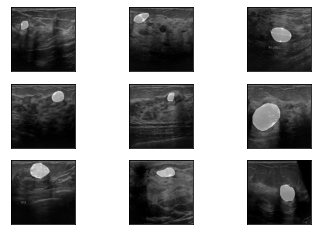

In [7]:
import matplotlib.pyplot as plt

sampleBenignInd = list()
sampleMaligInd = list()
for i in range(len(busiTrainLabels)):
  if busiTrainLabels[i] == 0 and len(sampleBenignInd) < 10:
    sampleBenignInd.append(i)
  elif busiTrainLabels[i] == 1 and len(sampleMaligInd) < 10:
    sampleMaligInd.append(i)
  if len(sampleBenignInd) == 9 and len(sampleMaligInd) == 9:
    break

print('The following are some benign BUS samples...')
fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(busiTrainImages[sampleBenignInd[0]], cmap='gray')

axs[0, 1].imshow(busiTrainImages[sampleBenignInd[1]], cmap='gray')

axs[0, 2].imshow(busiTrainImages[sampleBenignInd[2]], cmap='gray')

axs[1, 0].imshow(busiTrainImages[sampleBenignInd[3]], cmap='gray')

axs[1, 1].imshow(busiTrainImages[sampleBenignInd[4]], cmap='gray')

axs[1, 2].imshow(busiTrainImages[sampleBenignInd[5]], cmap='gray')

axs[2, 0].imshow(busiTrainImages[sampleBenignInd[6]], cmap='gray')

axs[2, 1].imshow(busiTrainImages[sampleBenignInd[7]], cmap='gray')

axs[2, 2].imshow(busiTrainImages[sampleBenignInd[8]], cmap='gray')



# remove the x and y ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

The following are some malignant BUS samples...


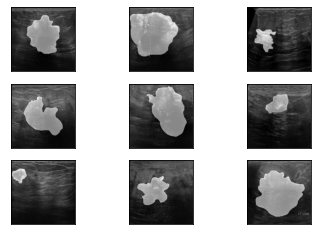

In [8]:
print('The following are some malignant BUS samples...')

fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(busiTrainImages[sampleMaligInd[0]], cmap='gray')

axs[0, 1].imshow(busiTrainImages[sampleMaligInd[1]], cmap='gray')

axs[0, 2].imshow(busiTrainImages[sampleMaligInd[2]], cmap='gray')

axs[1, 0].imshow(busiTrainImages[sampleMaligInd[3]], cmap='gray')

axs[1, 1].imshow(busiTrainImages[sampleMaligInd[4]], cmap='gray')

axs[1, 2].imshow(busiTrainImages[sampleMaligInd[5]], cmap='gray')

axs[2, 0].imshow(busiTrainImages[sampleMaligInd[6]], cmap='gray')

axs[2, 1].imshow(busiTrainImages[sampleMaligInd[7]], cmap='gray')

axs[2, 2].imshow(busiTrainImages[sampleMaligInd[8]], cmap='gray')



# remove the x and y ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [9]:
# Inspect the class label distribution
# The dataset has already been split into 75-25 train-test ratio.
# However, we would need to further split the training set into train and validation sets so that we can fine tune our CNN models effectively

print('Number of malignant BUS samples in BUSI train dataset: ',sum(busiTrainLabels))
print('Number of benign BUS samples in BUSI train dataset: ',len(busiTrainLabels)-sum(busiTrainLabels))

print('Number of malignant BUS samples in BUSI test dataset: ',sum(busiTestLabels))
print('Number of benign BUS samples in BUSI test dataset: ',len(busiTestLabels)-sum(busiTestLabels))

print('Number of malignant BUS samples in UDIAT train dataset: ',sum(udTrainLabels))
print('Number of benign BUS samples in UDIAT train dataset: ',len(udTrainLabels)-sum(udTrainLabels))

print('Number of malignant BUS samples in UDIAT test dataset: ',sum(udTestLabels))
print('Number of benign BUS samples in UDIAT test dataset: ',len(udTestLabels)-sum(udTestLabels))

Number of malignant BUS samples in BUSI train dataset:  169
Number of benign BUS samples in BUSI train dataset:  363
Number of malignant BUS samples in BUSI test dataset:  42
Number of benign BUS samples in BUSI test dataset:  91
Number of malignant BUS samples in UDIAT train dataset:  43
Number of benign BUS samples in UDIAT train dataset:  87
Number of malignant BUS samples in UDIAT test dataset:  11
Number of benign BUS samples in UDIAT test dataset:  22


In [10]:
# Split the training set in to train-validation splits.

from sklearn.model_selection import train_test_split

xTrainBUSI, xTestBUSI, yTrainBUSI, yTestBUSI = train_test_split(busiTrainImages, busiTrainLabels, test_size=0.2, random_state=42, stratify=busiTrainLabels)
xTrainUD, xTestUD, yTrainUD, yTestUD = train_test_split(udTrainImages, udTrainLabels, test_size=0.2, random_state=42, stratify=udTrainLabels)

print(xTrainBUSI.shape)
print(yTrainBUSI.shape)
print(xTestBUSI.shape)
print(yTestBUSI.shape)

print(xTrainUD.shape)
print(yTrainUD.shape)
print(xTestUD.shape)
print(yTestUD.shape)

(425, 224, 224)
(425,)
(107, 224, 224)
(107,)
(104, 224, 224)
(104,)
(26, 224, 224)
(26,)


In [11]:
xTrainBUSI = xTrainBUSI.reshape((-1, 224, 224, 1))
xTestBUSI = xTestBUSI.reshape((-1, 224, 224, 1))
busiTestImages = busiTestImages.reshape((-1, 224, 224, 1))

xTrainUD = xTrainUD.reshape((-1, 224, 224, 1))
xTestUD = xTestUD.reshape((-1, 224, 224, 1))
udTestImages = udTestImages.reshape((-1, 224, 224, 1))

print(xTrainBUSI.shape)
print(yTrainBUSI.shape)
print(xTestBUSI.shape)
print(yTestBUSI.shape)
print(busiTestImages.shape)
print(busiTestLabels.shape)

print(xTrainUD.shape)
print(yTrainUD.shape)
print(xTestUD.shape)
print(yTestUD.shape)
print(udTestImages.shape)
print(udTestLabels.shape)

(425, 224, 224, 1)
(425,)
(107, 224, 224, 1)
(107,)
(133, 224, 224, 1)
(133,)
(104, 224, 224, 1)
(104,)
(26, 224, 224, 1)
(26,)
(33, 224, 224, 1)
(33,)


### Once our data is ready, next we prepare our CNN model for training.

In [16]:
# ResNet50 Model
import tensorflow
from tensorflow.keras import layers

IMG_HEIGHT=224
IMG_WIDTH = 224
IMG_CHANNELS = 1
inputs = layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))


import tensorflow as tf
# from tf.keras.applications.resnet50 import ResNet50
# load model
model = tf.keras.applications.resnet50.ResNet50(include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(224,224,1))

x = model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
binary_output = layers.Dense(1, activation='sigmoid', name='binary_output')(x)


res50model = tf.keras.Model(inputs = inputs, outputs = binary_output)
print(res50model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23581440  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 32)                65568     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 binary_output (Dense)       (None, 1)                 33        
                                                           

In [17]:
# Compile model

res50model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/500
27/27 [==============================] - 20s 435ms/step - loss: 0.7007 - accuracy: 0.7318 - val_loss: 0.6258 - val_accuracy: 0.6822
Epoch 2/500
27/27 [==============================] - 10s 380ms/step - loss: 0.4671 - accuracy: 0.7694 - val_loss: 0.9987 - val_accuracy: 0.6822
Epoch 3/500
27/27 [==============================] - 10s 379ms/step - loss: 0.4202 - accuracy: 0.7859 - val_loss: 1.3625 - val_accuracy: 0.6822
Epoch 4/500
27/27 [==============================] - 10s 379ms/step - loss: 0.4693 - accuracy: 0.7576 - val_loss: 1.5140 - val_accuracy: 0.6822
Epoch 5/500
27/27 [==============================] - 10s 379ms/step - loss: 0.4124 - accuracy: 0.7976 - val_loss: 1.9304 - val_accuracy: 0.6822
Epoch 6/500
27/27 [==============================] - 10s 379ms/step - loss: 0.3543 - accuracy: 0.8047 - val_loss: 1.8451 - val_accuracy: 0.6822
Epoch 7/500
27/27 [==============================] - 10s 378ms/step - loss: 0.3722 - accuracy: 0.8188 - val_loss: 2.5172 - val_accuracy:

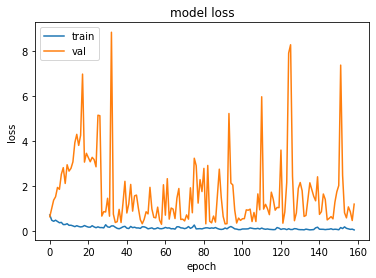

In [18]:
# Model training with earlystopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=100, verbose=1, mode='min',restore_best_weights=True)

history = res50model.fit(xTrainBUSI, yTrainBUSI,
              epochs=500,
              verbose=1,
              validation_data = (xTestBUSI, yTestBUSI), batch_size=16,
              callbacks = [es]
             )

# Plot the training and validation losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
preds = res50model.predict(busiTestImages).ravel()
print(preds.shape)

(133,)


In [20]:
# Evaluate model performance on several key metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics

binPreds = list()

for i in range(len(preds)):
  if preds[i]>0.5:
    binPreds.append(1)
  else:
    binPreds.append(0)
cm = confusion_matrix(binPreds, busiTestLabels)
print(cm)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

sens = TP / (TP + FN)
spec = TN / (TN + FP)
prec = TP / (TP + FP)
rec = TP / (TP + FN)
f1 = (2*prec*rec)/(prec+rec)
acc = (TP + TN) / (TP + FP + TN + FN)

print('ResNet50 performance')
print('Accuracy: ', acc)
print('Sensitivity: ', sens)
print('Specificity: ', spec)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1 Score: ', f1)

fpr, tpr, thresholds = metrics.roc_curve(busiTestLabels, preds, pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))

[[80  2]
 [11 40]]
ResNet50 performance
Accuracy:  0.9022556390977443
Sensitivity:  0.8791208791208791
Specificity:  0.9523809523809523
Precision:  0.975609756097561
Recall:  0.8791208791208791
F1 Score:  0.9248554913294798
AUC:  0.9850863422291993


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        7031232   
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 32)                32800     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 binary_output (Dense)       (None, 1)                 33        
                                                           

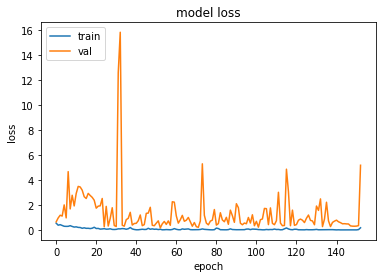

[[85  3]
 [ 6 39]]
DenseNet121 Classification performance.
Accuracy:  0.9323308270676691
Sensitivity:  0.9340659340659341
Specificity:  0.9285714285714286
Precision:  0.9659090909090909
Recall:  0.9340659340659341
F1 Score:  0.9497206703910613
AUC:  0.9774986917844061


In [21]:
# DenseNet121 based classification

model = tf.keras.applications.DenseNet121(include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(224,224,1))

x = model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
binary_output = layers.Dense(1, activation='sigmoid', name='binary_output')(x)


dense121model = tf.keras.Model(inputs = inputs, outputs = binary_output)
print(dense121model.summary())

# Compile model

dense121model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Model training with earlystopping

history = dense121model.fit(xTrainBUSI, yTrainBUSI,
              epochs=500,
              verbose=1,
              validation_data = (xTestBUSI, yTestBUSI), batch_size=16,
              callbacks = [es]
             )

# Plot the training and validation losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

preds = dense121model.predict(busiTestImages).ravel()

binPreds = list()

for i in range(len(preds)):
  if preds[i]>0.5:
    binPreds.append(1)
  else:
    binPreds.append(0)
cm = confusion_matrix(binPreds, busiTestLabels)
print(cm)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

sens = TP / (TP + FN)
spec = TN / (TN + FP)
prec = TP / (TP + FP)
rec = TP / (TP + FN)
f1 = (2*prec*rec)/(prec+rec)
acc = (TP + TN) / (TP + FP + TN + FN)

print('DenseNet121 Classification performance.')
print('Accuracy: ', acc)
print('Sensitivity: ', sens)
print('Specificity: ', spec)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1 Score: ', f1)

fpr, tpr, thresholds = metrics.roc_curve(busiTestLabels, preds, pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802208  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 32)                65568     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 binary_output (Dense)       (None, 1)                 33        
                                                           

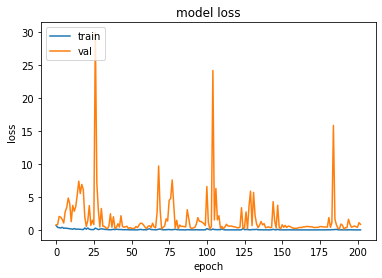

[[87  5]
 [ 4 37]]
InceptionV3 Model Classification performance.
Accuracy:  0.9323308270676691
Sensitivity:  0.9560439560439561
Specificity:  0.8809523809523809
Precision:  0.9456521739130435
Recall:  0.9560439560439561
F1 Score:  0.9508196721311475
AUC:  0.9612768184196755


In [22]:
# InceptionV3 based classification

model = tf.keras.applications.inception_v3.InceptionV3(include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(224,224,1))

x = model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
binary_output = layers.Dense(1, activation='sigmoid', name='binary_output')(x)


incv3model = tf.keras.Model(inputs = inputs, outputs = binary_output)
print(incv3model.summary())

# Compile model

incv3model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Model training with earlystopping

history = incv3model.fit(xTrainBUSI, yTrainBUSI,
              epochs=500,
              verbose=1,
              validation_data = (xTestBUSI, yTestBUSI), batch_size=16,
              callbacks = [es]
             )

# Plot the training and validation losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

preds = incv3model.predict(busiTestImages).ravel()

binPreds = list()

for i in range(len(preds)):
  if preds[i]>0.5:
    binPreds.append(1)
  else:
    binPreds.append(0)
cm = confusion_matrix(binPreds, busiTestLabels)
print(cm)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

sens = TP / (TP + FN)
spec = TN / (TN + FP)
prec = TP / (TP + FP)
rec = TP / (TP + FN)
f1 = (2*prec*rec)/(prec+rec)
acc = (TP + TN) / (TP + FP + TN + FN)

print('InceptionV3 Model Classification performance.')
print('Accuracy: ', acc)
print('Sensitivity: ', sens)
print('Specificity: ', spec)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1 Score: ', f1)

fpr, tpr, thresholds = metrics.roc_curve(busiTestLabels, preds, pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))

###The individual model prediction results so far are:

ResNet50
1. Accuracy:  0.9022556390977443
2. Sensitivity:  0.8791208791208791
3. Specificity:  0.9523809523809523
4. Precision:  0.975609756097561
5. Recall:  0.8791208791208791
6. F1 Score:  0.9248554913294798
7. AUC:  0.9850863422291993

InceptionV3
1. Accuracy:  0.9323308270676691
2. Sensitivity:  0.9560439560439561
3. Specificity:  0.8809523809523809
4. Precision:  0.9456521739130435
5. Recall:  0.9560439560439561
6. F1 Score:  0.9508196721311475
7. AUC:  0.9612768184196755

DenseNet121
1. Accuracy:  0.9323308270676691
2. Sensitivity:  0.9340659340659341
3. Specificity:  0.9285714285714286
4. Precision:  0.9659090909090909
5. Recall:  0.9340659340659341
6. F1 Score:  0.9497206703910613
7. AUC:  0.9774986917844061

### Next we try to check whether decision level ensembling of these individual models can do any better or not.

In [23]:
# Get individual model predictions
pred1 = res50model.predict(busiTestImages).ravel()
pred2 = incv3model.predict(busiTestImages).ravel()
pred3 = dense121model.predict(busiTestImages).ravel()

# Get probability averaging based ensembling predictions
preds = np.mean([pred1,pred2,pred3],axis=0)

# Calculate evaluation metrics for ensembled predictions
binPreds = list()

for i in range(len(preds)):
  if preds[i]>0.5:
    binPreds.append(1)
  else:
    binPreds.append(0)
cm = confusion_matrix(binPreds, busiTestLabels)
print(cm)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

sens = TP / (TP + FN)
spec = TN / (TN + FP)
prec = TP / (TP + FP)
rec = TP / (TP + FN)
f1 = (2*prec*rec)/(prec+rec)
acc = (TP + TN) / (TP + FP + TN + FN)

print('Ensembled Model Classification performance.')
print('Accuracy: ', acc)
print('Sensitivity: ', sens)
print('Specificity: ', spec)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1 Score: ', f1)

fpr, tpr, thresholds = metrics.roc_curve(busiTestLabels, preds, pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))

[[87  3]
 [ 4 39]]
Ensembled Model Classification performance.
Accuracy:  0.9473684210526315
Sensitivity:  0.9560439560439561
Specificity:  0.9285714285714286
Precision:  0.9666666666666667
Recall:  0.9560439560439561
F1 Score:  0.9613259668508287
AUC:  0.9837781266352694


We observe that in a masked enhanced setting, individual models are having pretty good results. Ensembling does not give significant improvements. However, the Ensemble model does provide all round decent evaluation metric values, with above 0.92 scores for every metric under consideration.